<img src="TP2_consigna.png" width="800px">

In [15]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

Implementar función create_gauss_filter

In [61]:
def create_gauss_filter(h, w, k_size=5, sigma=5):
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=sigma) 
    kernel_2d = kernel_1d * kernel_1d.T
    
    # Crea una matriz de ceros con las dimensiones que la imagen
    kernel_wpadding = np.zeros((h, w))
    # Calcula la posición inicial para centrar el filtro en la matriz de ceros
    inicio_alto = (h  - k_size) // 2
    inicio_ancho = (w  - k_size) // 2
    # Coloca el filtro en el centro de la matriz grande
    kernel_wpadding[inicio_alto:inicio_alto+k_size, inicio_ancho:inicio_ancho+k_size] = kernel_2d
    
    kernel_fft = np.fft.fft2(kernel_wpadding)
    
    return kernel_wpadding,kernel_fft

In [74]:
def probar_sigmas(img, k_size=5, sigma=5):
    h, w = img.shape
    kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)
    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss_fft = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    img_gauss= cv.GaussianBlur(img, ksize=(k_size, k_size), sigmaX=sigma,  sigmaY=sigma)

    kernel_tf_shifted = np.fft.fftshift(kernel_tf)
    return sigma,kernel, kernel_tf_shifted,img_gauss_fft,img_gauss

2
3
4
5


<function matplotlib.pyplot.show(close=None, block=None)>

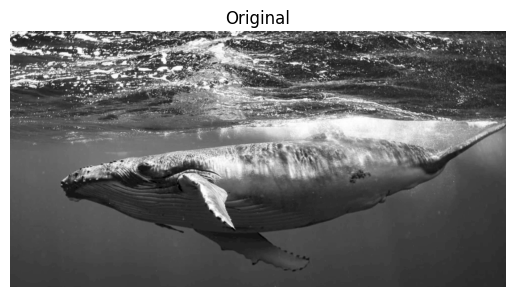

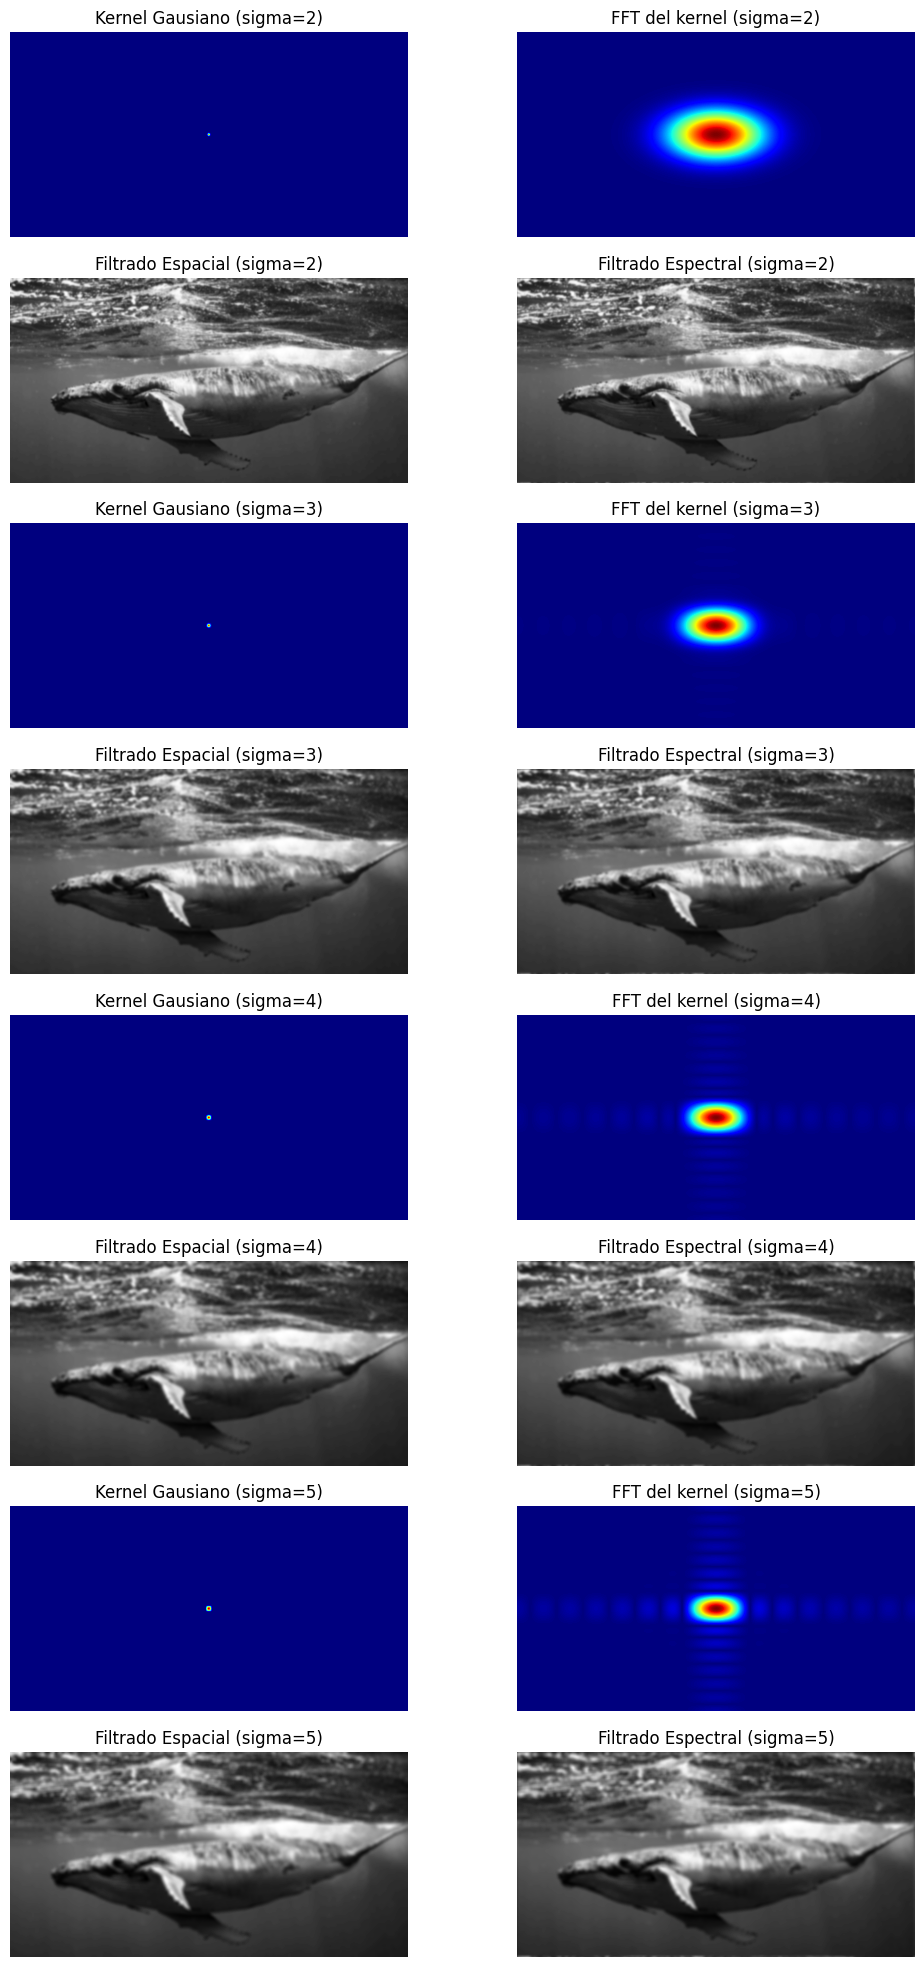

In [79]:
img_orig = cv.imread('ballena.png', cv.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img_orig, cmap='gray')
plt.axis('off')
plt.title("Original")
plt.show



plt.figure(figsize=(12,25))
for i in np.arange(0,4):
    sigma,kernel, kernel_tf_shifted,img_gauss_fft,img_gauss = probar_sigmas(img_orig, k_size=15, sigma=i+2)
    plt.subplot(8,2,i*4+1)
    plt.axis('off')
    plt.title(f'Kernel Gausiano (sigma={sigma})')
    plt.imshow(kernel, cmap='jet')
    plt.subplot(8,2,i*4+2)
    plt.axis('off')
    plt.title(f'FFT del kernel (sigma={sigma})')
    plt.imshow(np.abs(kernel_tf_shifted), cmap='jet')
    plt.subplot(8,2,i*4+3)
    plt.axis('off')
    plt.imshow(img_gauss, cmap='gray')
    plt.title(f'Filtrado Espacial (sigma={sigma})')
    plt.subplot(8,2,i*4+4)
    plt.axis('off')
    plt.imshow(img_gauss_fft, cmap='gray')
    plt.title(f'Filtrado Espectral (sigma={sigma})')
    #print(sigma)
plt.show


In [65]:
print (np.arange(0,4))

[0 1 2 3]
